<a href="https://colab.research.google.com/github/jjhonxpx/confeitaria_projeto01/blob/main/EDA_Confeitaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

## Preparação

- Carregamento de bibliotecas
- Leitura do conjunto de dados

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [5]:
df = pd.read_csv("dados_limpos.csv")

## Entendimento inicial do conjunto de dados

In [6]:
# @title Informações iniciais

display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,Produto,Categoria,Quantidade Vendida,Faturamento Total,Preço Médio,Custo Médio,Custo Total,Lucro,Margem
0,10 Salgadinhos (5 Frango + 5 Carne De Sol),Salgados,202,3434.0,17.000000,0.0,0.0,3434.0,1.0
1,2 Empadas - 130G (Frango E Carne De Sol),Salgados,12,328.0,27.333333,0.0,0.0,328.0,1.0
2,Empadão - Carne De Sol - 1Kg (8 Fatias),Salgados,27,2835.0,105.000000,0.0,0.0,2835.0,1.0
3,Empadão - Frango - 500G (5 Fatias),Salgados,137,6165.0,45.000000,0.0,0.0,6165.0,1.0
4,1 Empada - 130G (Frango),Salgados,463,6482.0,14.000000,0.0,0.0,6482.0,1.0


### Ultimas linhas

,Produto,Categoria,Quantidade Vendida,Faturamento Total,Preço Médio,Custo Médio,Custo Total,Lucro,Margem
163,Torta Matilda (12 Fatias),Tortas - Agendamento 24H - Retirada Em Loja -,4,1090.0,272.500000,0.0,0.0,1090.0,1.0
164,"Cesta Super Pai 01 - Para O Pai Que É Força, A...",Dia Dos Pais,2,310.0,155.000000,0.0,0.0,310.0,1.0
165,Cesta Super Pai 02 - O Sabor Da Gratidão Cabe ...,Dia Dos Pais,3,490.0,163.333333,0.0,0.0,490.0,1.0
166,Torta Cookie Com Nutella Da Casa (115G),Fatias E Sobremesas,1,20.0,20.000000,0.0,0.0,20.0,1.0
167,Pote Da Felicidade - Chocotudo - Zero Açúcar,Fatias E Sobremesas,1,22.5,22.500000,0.0,0.0,22.5,1.0


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Produto             168 non-null    object 
 1   Categoria           168 non-null    object 
 2   Quantidade Vendida  168 non-null    int64  
 3   Faturamento Total   168 non-null    float64
 4   Preço Médio         168 non-null    float64
 5   Custo Médio         168 non-null    float64
 6   Custo Total         168 non-null    float64
 7   Lucro               168 non-null    float64
 8   Margem              168 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.9+ KB


### Quantidade de valores únicos

,0
Produto,152
Categoria,20
Quantidade Vendida,79
Faturamento Total,155
Preço Médio,95
Custo Médio,2
Custo Total,2
Lucro,155
Margem,2


In [15]:
df_dict = pd.DataFrame([
    {
        "variavel": "Produto",
        "descricao": "Nome ou identificação do produto vendido.",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Categoria",
        "descricao": "Categoria ou grupo ao qual o produto pertence.",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Quantidade Vendida",
        "descricao": "Número total de unidades vendidas do produto.",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "Faturamento Total",
        "descricao": "Valor total obtido com as vendas do produto (em R$).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Preço Médio",
        "descricao": "Preço médio de venda por unidade do produto (em R$).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Custo Médio",
        "descricao": "Custo médio por unidade do produto (em R$).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Custo Total",
        "descricao": "Custo total associado à venda do produto (em R$).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Lucro",
        "descricao": "Lucro total obtido com as vendas do produto (em R$).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Margem",
        "descricao": "Proporção do lucro em relação ao faturamento total (em %).",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    }
])

df_dict

,variavel,descricao,tipo,subtipo
0,Produto,Nome ou identificação do produto vendido.,qualitativa,nominal
1,Categoria,Categoria ou grupo ao qual o produto pertence.,qualitativa,nominal
2,Quantidade Vendida,Número total de unidades vendidas do produto.,quantitativa,discreta
3,Faturamento Total,Valor total obtido com as vendas do produto (e...,quantitativa,contínua
4,Preço Médio,Preço médio de venda por unidade do produto (e...,quantitativa,contínua
5,Custo Médio,Custo médio por unidade do produto (em R$).,quantitativa,contínua
6,Custo Total,Custo total associado à venda do produto (em R$).,quantitativa,contínua
7,Lucro,Lucro total obtido com as vendas do produto (e...,quantitativa,contínua
8,Margem,Proporção do lucro em relação ao faturamento t...,quantitativa,contínua


## Distribuição das variáveis

In [16]:
# @title Resumo estatístico

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

       Produto            Categoria
count      168                  168
unique     152                   20
top       Vela  Fatias E Sobremesas
freq         3                   25


### Variáveis quantitativas

       Quantidade Vendida  Faturamento Total  Preço Médio  Custo Médio  \
count          168.000000         168.000000   168.000000   168.000000   
mean            70.130952        1867.285714    57.461202     0.416667   
std            162.882109        4633.566874    67.252736     5.400617   
min              1.000000           9.000000     4.500000     0.000000   
25%              4.750000         180.000000    16.125000     0.000000   
50%             22.000000         658.000000    25.785714     0.000000   
75%             56.500000        1926.000000    71.154095     0.000000   
max           1401.000000       41329.500000   302.076923    70.000000   

       Custo Total         Lucro      Margem  
count   168.000000    168.000000  168.000000  
mean      4.166667   1863.119048    0.997126  
std      54.006172   4634.259040    0.037246  
min       0.000000      9.000000    0.517241  
25%       0.000000    180.000000    1.000000  
50%       0.000000    658.000000    1.000000  
75% 

- Média de 70 unidades, mas com alta dispersão, há produtos que vendem muito mais que outros.
- A média de 1.867 reais no faturamento total indica grande variação também.
- O preço médio varia entre 4,50 reais e 72 reais, há produtos de baixo e alto valor unitário.
- A maioria dos produtos tem custo médio registrado como zero, o que pode indicar dados ausentes ou custo não informado.
- A maioria dos produtos tem custo médio também próximo de zero na maioria dos casos.
- A média do lucro é 1863 reais.
- Na maioria dos casos há margem de 100% de lucro.

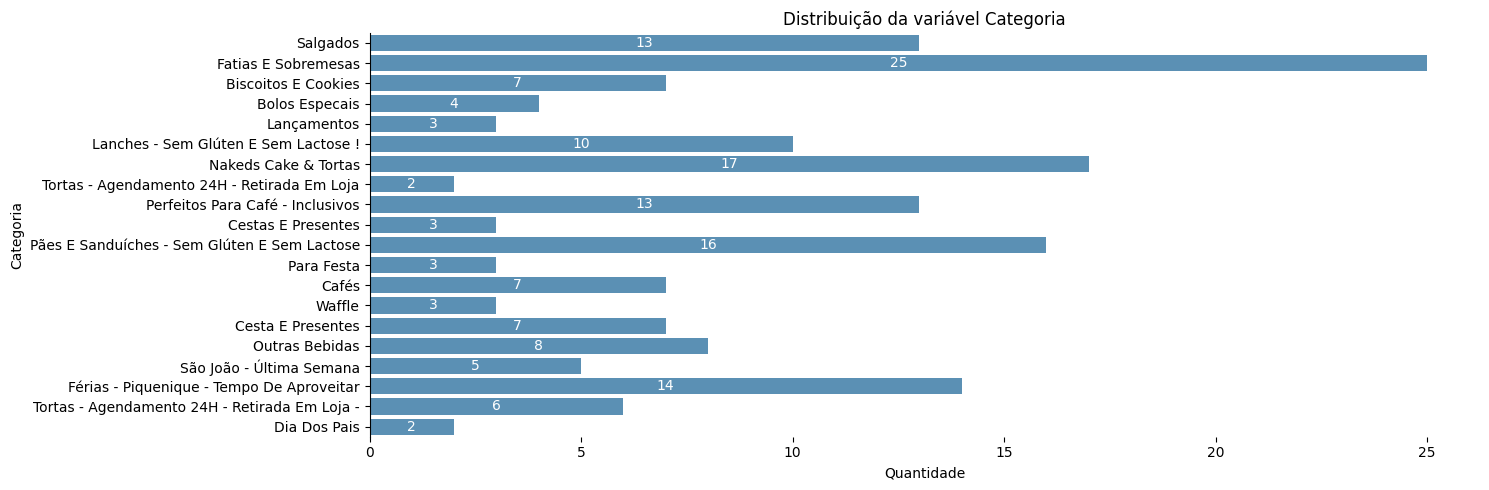

In [43]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict.query("variavel == 'Categoria'").variavel.to_list()

fig, ax = plt.subplots(figsize=(15, 5))

for i, variavel in enumerate(variaveis_qualitativas):
    sns.countplot(df, y=variavel, alpha=.8)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

[]

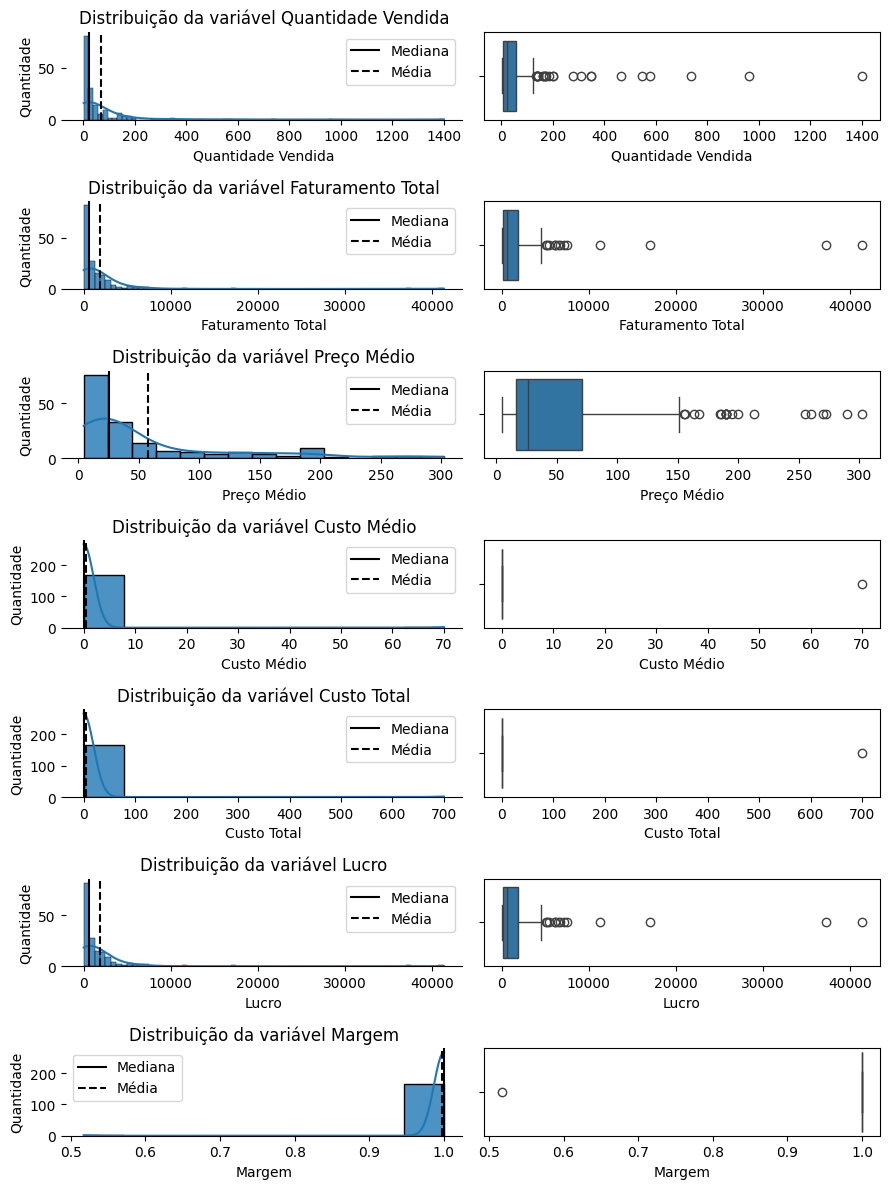

In [44]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(9, 12), ncols=2, nrows=7)

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(data=df, x=variavel, ax=axes[i, 0], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax.legend()
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax = sns.boxplot(data=df, x=variavel, ax=axes[i, 1])


plt.tight_layout()
plt.plot()